# BUSS6002 Week 9 - Optimization

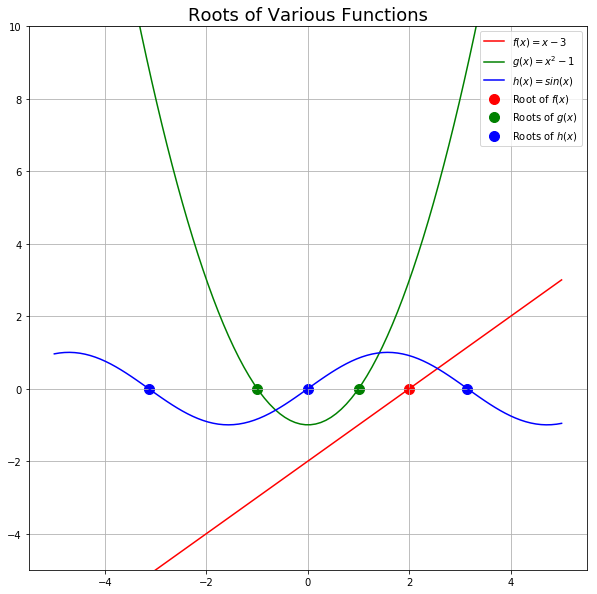

In [2]:
# THIS PLOT IS FOR ILLUSTRATION. YOU DON'T NEED TO READ THE CODE!
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 100)

y_1 = x - 2
y_2 = np.power(x, 2) - 1
y_3 = np.sin(x)

fig = plt.figure(figsize = (10,10))

plt.plot(x, y_1, color = "red", label = "$f(x) = x - 3$")
plt.scatter([2], [0], s = 100, color = "red", label = "Root of $f(x)$")

plt.plot(x, y_2, color = "green", label = "$g(x) = x^2 - 1$")
plt.scatter([1, -1], [0, 0], s = 100, color = "green", label = "Roots of $g(x)$")

plt.plot(x, y_3, color = "blue", label = "$h(x) = sin(x)$")
plt.scatter([-np.pi, 0, np.pi], [0, 0, 0], s = 100, color = "blue", label = "Roots of $h(x)$")

plt.ylim([-5, 10])
plt.legend()
plt.grid()
plt.title("Roots of Various Functions", fontsize = 18)

plt.show()

Root finding is important because finding the optimal point of a function usually translates to finding the roots of its derivative.

# Complicated Functions

These are functions that have more than one root.

These functions can be hard because:

- Root finding algorithms usually only find one root at a time
- Depending on where you start (initial point), your root finding algorithm will find different roots

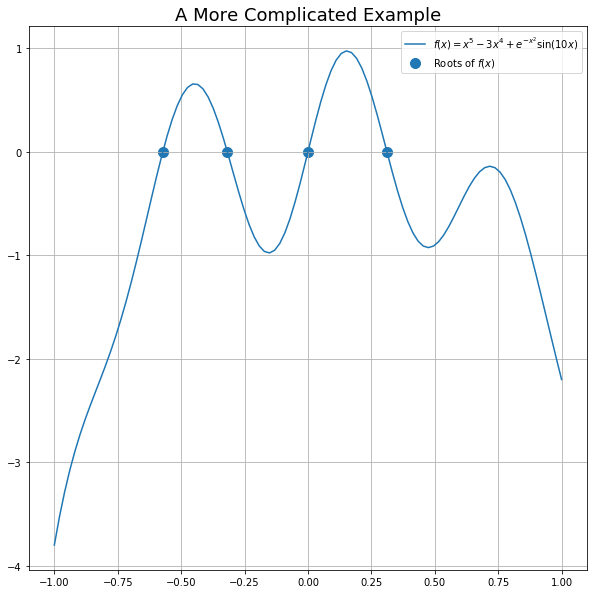

In [3]:
x = np.linspace(-1, 1, 100)

y_1 = x**5 -3*x**4 + np.exp(-x**2) * np.sin(10*x)

fig = plt.figure(figsize = (10,10))

plt.plot(x, y_1, label = "$f(x) = x^5 - 3x^4 + e^{-x^2} \sin(10x)$")
plt.scatter([ -0.572270586464421,  -0.317909632200591, 0, 0.311374273302995],
            [0, 0, 0, 0], s = 100, label = "Roots of $f(x)$")

plt.legend()
plt.grid()
plt.title("A More Complicated Example", fontsize = 18)

plt.show()

# Implementing Newton's Method

In [10]:
# First we need the function evaluation itself
def f(x):
    # Calculates f(x) = x^2 - 1
    return np.power(x, 2) - 1

# Second, we need the function derivative as well
# VERY IMPORTANT: THIS MEANS THIS REQUIRES US TO DERIVE THE DERIVATIVE ANALYTICALLY
def f_dx(x):
    # Calculates the value of the derivative of f
    # f'(x) = 2x
    return 2*x

def print_iteration(x):
    # In each iteration, we are going to monitor a few things:
    # x: The current input location that we are at
    # f(x): The current evaluation of that current input
    # Note: For each iteration, we are hoping that the changes in x gets smaller and smaller (that means it is converging)
    # Note: For each iteration, we are hoping that f(x) gets closer to 0 every time (that means it is converging)
    # Optional: You can also print the error (x_new - x_previous) and try to see if this gets closer to 0
    print("x = {0:.2f}, f(x) = {1:.2f}".format(x, f(x)))
    
    
x = 0.001 # Guess the solution - Initialisation (This is currently your x0, and we will update this value every iteration)

# Define the stopping criteria
error = np.inf  # We initialize error to be infinite at the start because we will monitor this error and update this error when the new error is less than the current error
tol = 0.01  # This is the threshold that we will choose

# Print out what we are monitoring at x0
print_iteration(x) # Show the initial guess and function value

# It is a while loop not a for loop because we do not know how many times we need to repeat at the start
# Here, the stopping criteria is that the error gets below a certain threshold
# The error is how close f(x) is to 0
while error > tol:
    
    fx = f(x) # Calculate function value at x
    fx_dx = f_dx(x) # Calculate derivative value at x
    
    # This is the Newton Raphson Update Rule
    x = x  - (fx / fx_dx) # Update our value of x
    
    # Recalculate our error
    error = np.abs(fx - 0) # Calculate the error
    
    # Print out what we are monitoring
    print_iteration(x)

x = 0.00, f(x) = -1.00
x = 500.00, f(x) = 249999.50
x = 250.00, f(x) = 62499.63
x = 125.00, f(x) = 15624.66
x = 62.51, f(x) = 3905.91
x = 31.26, f(x) = 976.23
x = 15.65, f(x) = 243.81
x = 7.86, f(x) = 60.70
x = 3.99, f(x) = 14.93
x = 2.12, f(x) = 3.50
x = 1.30, f(x) = 0.68
x = 1.03, f(x) = 0.07
x = 1.00, f(x) = 0.00
x = 1.00, f(x) = 0.00


Notes for Stopping Criteria:

Stopping criteria (for root finding) are usually one of the following:

- You monitor the change in x itself, and stop when the change in x gets below a threshold
- You monitor the change in f(x), and stop when the change in f(x) gets below a threshold
- You monitor f(x) itself (not the change), and stop when f(x) gets close to 0 by a threshold

# Applying Gradient Descent to Learn Regression Models

This is a linear regression example and we are trying to learn one thing: $\beta_1$ (slope), so no intercept

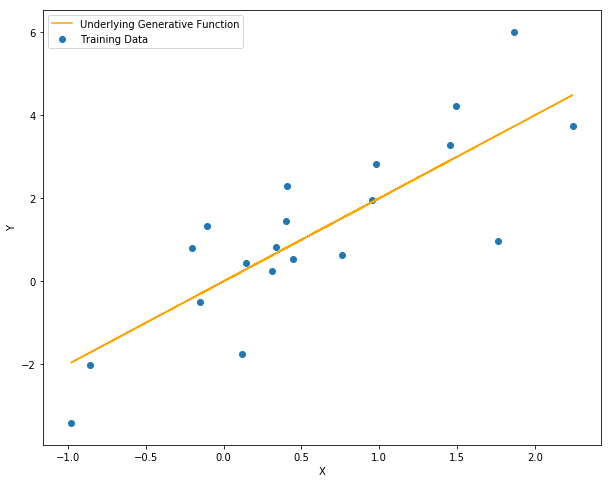

In [11]:
# THIS CELL IS USED TO GENERATE SOME SYNTHETIC DATA
# This means this is not the algorithm just yet, we are just generating data from TRUE parameters and later we want to see if 
# we can recover those true parameters

# This is the true parameter (slope)
beta_1_true = 2

# Set the random seed to any specific number (it doesn't have to be 0 as long as it is a fixed number)
# This is so that when you repeat running this code, it will generate the same random dataset
np.random.seed(0)

# The number observations we want to generate (size of our dataset)
N = 20

# Noise standard deviation of the observation
noise_std = 1

# Generate a bunch of inputs (for the purpose of our example, it does NOT matter what the distribution of x is)
x = np.random.randn(N)

# Here we are using the linear equation to generate our data
# np.random.randn(N) is very important: The standard linear regression model assumes Gaussian noise
y = beta_1_true * x + (np.random.randn(N) * noise_std)

# Create figure
plt.figure(figsize = (10, 8))

# Plot the true generating function (which is a line with the true slope)
plt.plot(x, beta_1_true*x, label = "Underlying Generative Function", color = "orange")

# Plot the data we just generated (this is going to be the training data for our algorithm in the next cell)
plt.scatter(x, y, label = "Training Data")

# Label and show
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

Next, we are going to run the gradient descent algorithm to recover $\beta_1$ (ideally we want it to recover / learn that it is 2)

In [12]:
# This is the function we want to optimize
# In this case, it is the sum of the squared losses
# between the line (beta * x) specified by the CURRENT slope (beta) and the observation (y)
# So this is an example of a loss
# NOTE: We do not actually use this in gradient descent itself, since gradient descent only need the gradient
def f(x, y, beta):
    return np.sum((x*beta - y)**2)

# This is the gradient of the function we wish to optimize
# Notice that we used the chain rule to derive this by hand (if you use automatic differiation, they will use the chain rule to
# automatically find the gradient for you)
# NOTE: Intuitively, this specifies the direction to CHANGE to INCREASE the loss (so we want to go the opposite way)
def gradient_f(x, y, beta):
    return 2 * np.sum(x*(x*beta - y))

# NOTE: Remember in the above two functions, the thing that we are changing / optimizing is BETA (not x, not y)

# Initialize a starting guess for the correct slope
beta =  10

# Initialize the function value at the previous guess
f_past = f(x, y, beta)

# Choose a learning rate (step size)
alpha = 0.001

# This is the error you will accept and use as a stopping criteria
tol = 1e-6

# This is the maximum iteration that you want to run the algorithm
# This means, even if the solution has NOT been reached to the acceptable tolerance, we will still stop
max_iterations = 1000

# Repeat the following for the maximum allowed iterations
for i in range(max_iterations):
    
    # Take your gradient step and update your parameters
    beta_next = beta - alpha * gradient_f(x, y, beta)
    
    # Evaluate what the function (loss) value is at the new parameters
    # We are only doing this for calculating stopping criteria (not for actually updating the parameters / gradient step)
    f_next = f(x, y, beta_next)
    
    # The difference between the previous function (loss) value and the current function (loss) value
    f_change = abs(f_past - f_next)
    
    # If the difference is very small compared to the tolerance (which means the loss did not change much)
    if f_change < tol:
        # Then, we can stop
        print("Terminating Early")
        break
    
    # Otherwise, we are going to continue
    # So, make the next parameter the current parameter and the next function value the current function value
    # So when it repeats, it will use the new values
    beta = beta_next
    f_past = f_next

print(beta_next)

Terminating Early
2.115310580180859


Here we will try changing our stopping criteria

In [15]:
# This is the function we want to optimize
# In this case, it is the sum of the squared losses
# between the line (beta * x) specified by the CURRENT slope (beta) and the observation (y)
# So this is an example of a loss
# NOTE: We do not actually use this in gradient descent itself, since gradient descent only need the gradient
def f(x, y, beta):
    return np.sum((x*beta - y)**2)

# This is the gradient of the function we wish to optimize
# Notice that we used the chain rule to derive this by hand (if you use automatic differiation, they will use the chain rule to
# automatically find the gradient for you)
# NOTE: Intuitively, this specifies the direction to CHANGE to INCREASE the loss (so we want to go the opposite way)
def gradient_f(x, y, beta):
    return 2 * np.sum(x*(x*beta - y))

# NOTE: Remember in the above two functions, the thing that we are changing / optimizing is BETA (not x, not y)

# Initialize a starting guess for the correct slope
beta =  10

# Initialize the function value at the previous guess
f_past = f(x, y, beta)

# Choose a learning rate (step size)
alpha = 0.001

# This is the error you will accept and use as a stopping criteria
tol = 0.001

# This is the maximum iteration that you want to run the algorithm
# This means, even if the solution has NOT been reached to the acceptable tolerance, we will still stop
max_iterations = 1000

# Repeat the following for the maximum allowed iterations
for i in range(max_iterations):
    
    # Take your gradient step and update your parameters
    beta_next = beta - alpha * gradient_f(x, y, beta)
    
    # The difference between the previous function (loss) value and the current function (loss) value
    beta_change = abs(beta - beta_next)
    
    # If the difference is very small compared to the tolerance (which means the loss did not change much)
    if beta_change < tol:
        # Then, we can stop
        print("Terminating Early")
        break
    
    # Otherwise, we are going to continue
    # So, make the next parameter the current parameter and the next function value the current function value
    # So when it repeats, it will use the new values
    beta = beta_next
    f_past = f_next

print(beta_next)

Terminating Early
2.13707124525925


# Gradient Descent

(See Visualization)

The update rule is

$$ x_{new} = x_{old} - \alpha \nabla f(x_{old}) $$

The stopping criteria could be:

- Stop when the maximum iterations you want to repeat for has reached (not guaranteed to converge)
- Stop when the function (loss) evaluations stop changing that much (changes are smaller than a threshold). For example:
$$| f(x_{new}) - f(x_{old}) | < \epsilon$$
where $\epsilon$ is a small number that you have to choose. Alternatively, in the context of machine learning,
$$| \mathcal{L}(\theta_{new}) - \mathcal{L}(\theta_{old}) | < \epsilon$$
where $\theta$ are your parameters and $\mathcal{L}$ is your loss.
- Stop when the inputs (parameters) stop changing that much. For example:
$$| x_{new} - x_{old} | < \epsilon$$. Alternatively,
$$| \theta_{new} - \theta_{old} | < \epsilon$$

Correction:

$\hat{\beta} = \mathrm{argmin}_{\beta} \sum_{i = 1}^{N} (\beta x_{i} - y_{i})^{2}$

NOT THIS:

$\hat{\beta} = \mathrm{min}_{\beta} \sum_{i = 1}^{N} (\beta x_{i} - y_{i})^{2}$